# Box Office Movies Exploration

    Student name: Phase 2 Group 8 (Damaris Wanjiru / Henry Kemboi / Elizabeth Atieno / Gerald Muhia / Caleb Kipkech / Collins Kwata)
    Student pace: Full Time Remote
    Scheduled project review date/time:31st october 2024
    Instructor name: Asha Deen
    

# Project Overview

Our company is launching a new film studio to tap into the growing demand for original video content. With no prior experience in the industry, we have been tasked with analyzing current box office trends to identify the most successful film types. The goal is to deliver actionable insights that will guide the studio's direction and ensure a strong start in the competitive movie market.

# Business Understanding
* **Business Context**: Our company aims to enter the original video content market by launching a new film studio, despite having prior experience in movie production. To ensure success, we are tasked with analyzing current box office trends to identify top-performing film types. Our insights will guide the studio's leadership in making informed decisions about which genres to focus on.
*  **Problem Statement**: We need to identify top-performing film type, understand the current box office trends and evaluate the impact of different factors on movie perfomance.

# Objectives
1. Analyze the correlation between runtime and genre and whether either of the two has an impact on average ratings.
2. Evaluate the impact of release date on genre ratings to identify trends and pinpoint which genres consistently receive high ratings over time.
3. Assess directors' performance to determine which has achieved the highest return on investment within specific genres.
4. Identify directors known for producing critically acclaimed works within top-rated genres.
5. Determine which genre has achieved the highest return on investment, considering both production costs and box office earnings.


### Importing the Relevant Libraries

To begin, we will import all the relevant libraries necessary for our analysis. These are listed below:

- `Pandas` - Enables us to manipulate imported datasets saved as dataframes.
- `Numpy`  - Enables us to compute mathematical functions as well as perform array operations.
- `Seaborn` - Enables us to visualise the data.
- `Matplotlib` - Additional library to assist in visualising the data.
- `Scipy.stats` - Assists in performing statistical calculations.
- `Sqlite3` - Allows us to perform SQL operations and access database data in this Jupyter notebook.

In [1]:
# importing relevant libraries
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import sqlite3
import statsmodels.api as sm


%matplotlib inline

### Loading  and Review of Datasets  Individually

Once we have imported the libraries, next step is to load and review the datasets individually. This will help determine the datasets relevant to our analysis. 


### Rotten Tomatoes Movie Review Dataset


In [2]:
# Loading the Review tsv dataset display first and last 5 rows
df_review= pd.read_csv("zippedData/rt.reviews.tsv.gz", delimiter='\t', encoding='ISO-8859-1')
df_review.head()

,id,review,rating,fresh,critic,top_critic,publisher,date
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
1,3,It's an allegory in search of a meaning that n...,NaN,rotten,Annalee Newitz,0,io9.com,"May 23, 2018"
2,3,... life lived in a bubble in financial dealin...,NaN,fresh,Sean Axmaker,0,Stream on Demand,"January 4, 2018"
3,3,Continuing along a line introduced in last yea...,NaN,fresh,Daniel Kasman,0,MUBI,"November 16, 2017"
4,3,... a perverse twist on neorealism...,NaN,fresh,NaN,0,Cinema Scope,"October 12, 2017"


From the dataframe above `df_review`, we seem to be missing crucial data relating to movies such as movie title, genre etc. It's quite difficult to make out the movie being critiqued based on the `review` and `id` column. In addition, for the columns that do have data, there seems to be incomplete data such as name of the critics and movie rating. Due to the inability to deduce the movie being critiqued, we will not be proceeding forward with this **Rotten Tomatoes Movie Review** dataset.

### Movie DB Dataset

In [3]:
# Load the Movie Db Dataset and Display the First and Last Five Rows
moviesdb_df= pd.read_csv("zippedData/tmdb.movies.csv.gz", compression='gzip')
moviesdb_df.head()

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


The `movies db` dataframe  provides us with a lot more information than the `df_review` dataframe. We are able to get the movie titles, popularity,vote count and vote average which may be quite beneficial in our analysis. However, the `genre` column is a list of numbers which require additional mapping that we do not have access to. Due to this, we will not be utilizing this **Movie DB** dataset for our analysis.

### Movie_Info Dataset

In [4]:
# Loading movie_info tsv and Display the First and Last Five Rows
movie_info_df= pd.read_csv("zippedData/rt.movie_info.tsv.gz", sep='\t', compression='gzip')
movie_info_df.head()

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN


The `movie_info_df` dataframe possesses similar characteristics to the `df_review` dataframe. It does not give us information relating to the movie title and we are not able to link the id provided here to any other dataset. Also, the data has a lot of null values and as such we will not be utilizing the **Movie Info** dataset going forward. 

### Movie Budgets Dataset

In [5]:
# Loading movie budget tsv and Display the First and Last Five Rows
df_budget= pd.read_csv("zippedData/tn.movie_budgets.csv.gz")
df_budget.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


This `df_budget` dataframe provides a summary overview of the movie titles, release date as well as their corresponding budget and gross sales amounts. Thus, the **Movie Budgets** dataset will be quite beneficial to our analysis in the calculation of the return on investment and as such, we will proceed forward with it.

### Bom Movie Gross Dataset From Box office

In [6]:
bom_gross_df =pd.read_csv("zippedData/bom.movie_gross.csv.gz")
bom_gross_df.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


From the `bom_gross_df`, we get to have a view of the list of the box office movies along with the year of releases together with their corresponding gross sales amounts. As this analysis is focusing on performance of movies at the box office, this **BOM MOVIE** dataset will be our base dataset on which we will we center our analysis on.

### Loading SQL Database and creating a connection

Having loaded and reviewed the datasets, we now need to check if we can get additional data from the im.db database that we can build our anlaysis on. As such we will follow the following steps:

- Access the database through creating a connection using `sqlite3`
- Obtain the table names and review each of the tables in the database to determine which tables to retain for our analysis

In [7]:
#Access the Database

conn = sqlite3.connect("zippedData/im.db")

In [8]:
#Access the table names

table_name_query = """SELECT name 
                      AS 'Table Names' 
                      FROM sqlite_master 
                      WHERE type='table';"""

pd.read_sql(table_name_query, conn)

,Table Names
0,movie_basics
1,directors
2,known_for
3,movie_akas
4,movie_ratings
5,persons
6,principals
7,writers


On review of tables in the database, we were able to drill down to the following four tables:

- `directors` - Contains data on the director id associated with a particular movie ID 
- `persons` - Contains additional information relating to the director such as director name, occupation etc. 
- `movie_ratings` - Contains data relating to movies such as runtime, genre, movie titles etc.
- `movie_basics` - Contains data relating to ratings, votecounts etc 

Therefore, we will now run a query that joins all these tables and extracts the following fields required for our analysis:

- `original_title`
- `start_year`
- `runtime_minutes`
- `genres`
- `averagerating`
- `numvotes`
- `primary_name`
-`primary_profession`



In [9]:
# Selecting key information for analysis from multiple tables in the database, including 
# movie titles, release years, runtime, genres, ratings, vote counts, director names, and
# professions. 
# This query integrates data from `movie_basics`, `movie_ratings`, `directors`, and `persons
# tables to align with project objectives.
df_imdb =pd.read_sql("""

SELECT DISTINCT original_title, 
                start_year,
                runtime_minutes,
                genres,
                averagerating,
                numvotes,
                primary_name,
                primary_profession
  FROM movie_basics
       JOIN movie_ratings
       ON movie_basics.movie_id = movie_ratings.movie_id
              JOIN directors
               ON movie_ratings.movie_id = directors.movie_id
                  JOIN persons
                    ON directors.person_id = persons.person_id;
 

""",conn)

df_imdb

,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,primary_name,primary_profession
0,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77,Harnam Singh Rawail,"director,writer,producer"
1,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43,Mani Kaul,"director,writer,actor"
2,The Other Side of the Wind,2018,122.0,Drama,6.9,4517,Orson Welles,"actor,director,writer"
3,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",6.1,13,Hrishikesh Mukherjee,"director,editor,writer"
4,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119,Raoul Ruiz,"director,writer,producer"
...,...,...,...,...,...,...,...,...
86019,Diabolik sono io,2019,75.0,Documentary,6.2,6,Giancarlo Soldi,"director,writer,producer"
86020,Sokagin Çocuklari,2019,98.0,"Drama,Family",8.7,136,Ahmet Faik Akinci,"director,writer"
86021,Albatross,2017,NaN,Documentary,8.5,8,Chris Jordan,"director,writer,editor"
86022,La vida sense la Sara Amat,2019,NaN,None,6.6,5,Laura Jou,"miscellaneous,actress,director"


### Merging the datasets

Now that we have all the datasets, next step is to merge them into one dataset and perform data cleaning on the merged datasets. The datasets we will be merging are:

- `bom_gross_df`
- `df_budget`
- `df_imdb`

We'll start off by merging `bom_gross_df` and `df_imdb` on the movie title column as it is common between the two dataframes. However, we will have to rename these columns in the their respective dataframes.

In [10]:
# We rename the common column in both DataFrames
bom_gross_df.rename(columns ={"title":"Movie_title"}, inplace = True)
df_imdb.rename(columns ={"original_title":"Movie_title"}, inplace = True)

In [11]:
# Confirming that the renaming has been updated in  bom_gross_df
bom_gross_df.head()

,Movie_title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [12]:
# Confirming that the renaming has been updated in the df_imdb
df_imdb.head()

,Movie_title,start_year,runtime_minutes,genres,averagerating,numvotes,primary_name,primary_profession
0,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77,Harnam Singh Rawail,"director,writer,producer"
1,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43,Mani Kaul,"director,writer,actor"
2,The Other Side of the Wind,2018,122.0,Drama,6.9,4517,Orson Welles,"actor,director,writer"
3,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",6.1,13,Hrishikesh Mukherjee,"director,editor,writer"
4,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119,Raoul Ruiz,"director,writer,producer"


As part of this step we observe the dimensions as well as presence of duplicates in both dataframes before merging them.

In [13]:
#Checking the dimensions of the bom_gross_df

bom_gross_df.shape

(3387, 5)

In [14]:
#Checking the dimensions of the bom_gross_df

df_imdb.shape

(86024, 8)

In [15]:
# Checking for duplicates in bom_gross_df and df_imdb based on movie title
duplicates_bom_gross_df = bom_gross_df[bom_gross_df.duplicated(subset="Movie_title")]
duplicates_df_imdb = df_imdb[df_imdb.duplicated(subset="Movie_title")]
print("Duplicates in bom_gross_df =", len(duplicates_bom_gross_df))
print("Duplicates in df_imdb =" ,len(duplicates_df_imdb))

Duplicates in bom_gross_df = 1
Duplicates in df_imdb = 15637


In [16]:
# Observing the duplicate rows in the bom_gross_df 
duplicates_bom_gross_df.head()

,Movie_title,studio,domestic_gross,foreign_gross,year
3045,Bluebeard,WGUSA,43100.0,NaN,2017


In [17]:
# Observing the duplicate rows in the bom_gross_df 
duplicates_df_imdb.head()

,Movie_title,start_year,runtime_minutes,genres,averagerating,numvotes,primary_name,primary_profession
5,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119,Valeria Sarmiento,"editor,director,writer"
20,Gangavataran,2018,134.0,None,6.6,8,Dhundiraj Govind Phalke,"director,writer,cinematographer"
27,Kurzzeithelden,2015,45.0,Sci-Fi,6.6,16,Roman Gonther,"visual_effects,director,writer"
33,Quantum Quest: A Cassini Space Odyssey,2010,45.0,"Adventure,Animation,Sci-Fi",5.1,287,Harry 'Doc' Kloor,"producer,writer,miscellaneous"
62,The Three Stooges,2012,92.0,"Comedy,Family",5.1,28570,Peter Farrelly,"producer,writer,director"


In [18]:
#Merge the two dataframes on a common feature Movie_title and create a new dataframe

merged_movies_df = bom_gross_df.merge(df_imdb, on = 'Movie_title', how = 'left')

We now proceed with a left merge and create a new dataframe `merged_movies_df`


In [19]:
# checking the shape number of rows and columns our new dataframe
merged_movies_df.shape

(4023, 12)

From the merge above, it does seem that there has been additional records added to our original `bom_gross_df` dataframe. This is expected if there is more than one record in the `df_imdb` that relate to a record in the `bom_gross_df` dataframe. 

In [20]:
# check the first few rows of the merged dataframe
merged_movies_df.head()

,Movie_title,studio,domestic_gross,foreign_gross,year,start_year,runtime_minutes,genres,averagerating,numvotes,primary_name,primary_profession
0,Toy Story 3,BV,415000000.0,652000000,2010,2010.0,103.0,"Adventure,Animation,Comedy",8.3,682218.0,Lee Unkrich,"editorial_department,editor,miscellaneous"
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Inception,WB,292600000.0,535700000,2010,2010.0,148.0,"Action,Adventure,Sci-Fi",8.8,1841066.0,Christopher Nolan,"writer,producer,director"
4,Shrek Forever After,P/DW,238700000.0,513900000,2010,2010.0,93.0,"Adventure,Animation,Comedy",6.3,167532.0,Mike Mitchell,"actor,director,writer"


Now that we have created a merged dataframe `merged_data_frame`, we will proceed with merging this dataset with the `df_budget`dataframe as shown below. Similar steps will be applied here.

In [21]:
# Renaming movie column in  df_budget to have a commom feature we can merge on
df_budget.rename(columns ={"movie":"Movie_title"}, inplace = True)
df_budget.head()

,id,release_date,Movie_title,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [22]:
# Merging  merged_movies_df with df_budget to create a comprehensive master dataset for our analysis

final_merged_movies_df = merged_movies_df.merge(df_budget, on = 'Movie_title', how = 'left')
final_merged_movies_df.head()

,Movie_title,studio,domestic_gross_x,foreign_gross,year,start_year,runtime_minutes,genres,averagerating,numvotes,primary_name,primary_profession,id,release_date,production_budget,domestic_gross_y,worldwide_gross
0,Toy Story 3,BV,415000000.0,652000000,2010,2010.0,103.0,"Adventure,Animation,Comedy",8.3,682218.0,Lee Unkrich,"editorial_department,editor,miscellaneous",47.0,"Jun 18, 2010","$200,000,000","$415,004,880","$1,068,879,522"
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Inception,WB,292600000.0,535700000,2010,2010.0,148.0,"Action,Adventure,Sci-Fi",8.8,1841066.0,Christopher Nolan,"writer,producer,director",38.0,"Jul 16, 2010","$160,000,000","$292,576,195","$835,524,642"
4,Shrek Forever After,P/DW,238700000.0,513900000,2010,2010.0,93.0,"Adventure,Animation,Comedy",6.3,167532.0,Mike Mitchell,"actor,director,writer",27.0,"May 21, 2010","$165,000,000","$238,736,787","$756,244,673"


In [23]:
# Checking the shape of our master dataset
print(f"We have {final_merged_movies_df.shape[0]} rows and {final_merged_movies_df.shape[1]} columns")

We have 4043 rows and 17 columns


In [24]:
#Checking for duplicates based on Movie_title entries

duplicates_final_merged_movies_df = final_merged_movies_df[final_merged_movies_df.duplicated(subset="Movie_title")]
print(len(duplicates_final_merged_movies_df ))

657


In [25]:
# Getting to understand the structure of our master dataset through a concise summary
final_merged_movies_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4043 entries, 0 to 4042
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Movie_title         4043 non-null   object 
 1   studio              4037 non-null   object 
 2   domestic_gross_x    4008 non-null   float64
 3   foreign_gross       2466 non-null   object 
 4   year                4043 non-null   int64  
 5   start_year          2792 non-null   float64
 6   runtime_minutes     2727 non-null   float64
 7   genres              2787 non-null   object 
 8   averagerating       2792 non-null   float64
 9   numvotes            2792 non-null   float64
 10  primary_name        2792 non-null   object 
 11  primary_profession  2792 non-null   object 
 12  id                  1589 non-null   float64
 13  release_date        1589 non-null   object 
 14  production_budget   1589 non-null   object 
 15  domestic_gross_y    1589 non-null   object 
 16  worldw

We now have a master dataset that has merged all the datasets. Based on the `movie title` we can observe that we have 657 duplicates in this dataset already. Also, from the summary above, there seems to be a lot of null values in the columns following the merge. Therefore, the dataset needs to be cleaned before any meaningful, analysis can be done.

### Data Cleaning and Checking for Missing Values

To begin, we will make a copy of the data and make changes to this. This will ensure we have the original masterdata in the event we need to go back to it for additional reference



In [26]:
# Make a copy before modifying the masterdata
merged_movies_analysis_df= final_merged_movies_df.copy()

#### Check For Missing Values

As has been observed earlier, there are a lot of missing values. Let's take a deep look into this.

In [27]:
merged_movies_analysis_df.isna().sum()

Movie_title              0
studio                   6
domestic_gross_x        35
foreign_gross         1577
year                     0
start_year            1251
runtime_minutes       1316
genres                1256
averagerating         1251
numvotes              1251
primary_name          1251
primary_profession    1251
id                    2454
release_date          2454
production_budget     2454
domestic_gross_y      2454
worldwide_gross       2454
dtype: int64

 ##### Percentage of Null values
 

In [28]:
# Calculate null percentage for each column
null_percentage = [(col, (merged_movies_analysis_df[col].isna().sum() / len(merged_movies_analysis_df)) * 100) for col in merged_movies_analysis_df.columns]

# Create a DataFrame from the null percentages
null_percentage_df = pd.DataFrame(null_percentage, columns=["Columns", "Null Percentages"])

# Sort in descending order
null_percentage_df = null_percentage_df.sort_values(by="Null Percentages", ascending=False)
null_percentage_df

,Columns,Null Percentages
13,release_date,60.697502
12,id,60.697502
14,production_budget,60.697502
15,domestic_gross_y,60.697502
16,worldwide_gross,60.697502
3,foreign_gross,39.005689
6,runtime_minutes,32.550087
7,genres,31.066040
5,start_year,30.942370
10,primary_name,30.942370


 Working with a dataset containing columns with 60% nulls can be challenging, but retaining these columns can be advantageous if they hold significant relevance to our business problem. Here’s why keeping these columns but working with fewer rows can be beneficial:

* **Preserving Feature Diversity:** Retaining column structure while using fewer rows maintains a broader set of features, potentially leading to a more comprehensive and balanced analysis.

* **Enhancing Model Relevance** Retaining high-relevance columns (even with some missing data) can improve model accuracy, especially if these columns strongly influence the target variable. This approach may yield more relevant predictions compared to models with higher row counts but less meaningful features.

* **Maintaining Critical Information**: If certain columns (e.g., production budget, domestic/foreign revenue, runtime, or genre) are vital to the business question, dropping them would mean losing key metrics or context essential to achieving valuable insights.

* **Avoiding Bias from Selective Imputation**: Imputing values in high-null columns can introduce biases, especially if the missing data isn't randomly distributed. By carefully retaining rows rather than using selective imputation, the analysis remains more reliable and less prone to misleading conclusions.

By prioritizing relevant columns over row count, the dataset remains aligned with the primary analytical objectives, ultimately supporting more accurate and insightful outcomes while minimizing the risk of bias.



In [29]:
# Drop rows with null values and reassign to mmerged_movies_analysis_df
merged_movies_analysis_df= merged_movies_analysis_df.dropna()

# Check if there are any remaining null values
merged_movies_analysis_df.isna().sum()

Movie_title           0
studio                0
domestic_gross_x      0
foreign_gross         0
year                  0
start_year            0
runtime_minutes       0
genres                0
averagerating         0
numvotes              0
primary_name          0
primary_profession    0
id                    0
release_date          0
production_budget     0
domestic_gross_y      0
worldwide_gross       0
dtype: int64

##### Check for Duplicates

We will now check to see if there are any duplicates present in this data. As a result of removing the null values, we can observe that the data is now free of any duplicates. We are now ready to proceed to perform analysis using this data.

In [30]:
# Checking for duplicate
print(f"We have {merged_movies_analysis_df.duplicated().sum()} duplicates in this dataset")

We have 0 duplicates in this dataset


In [31]:
# checking how many rows and columns in mmerged_movies_analysis_df
print(f"We have {merged_movies_analysis_df.shape[0]} rows and {merged_movies_analysis_df.shape[1]} in our clean dataframe")

We have 1264 rows and 17 in our clean dataframe


In [32]:
merged_movies_analysis_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1264 entries, 0 to 3909
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Movie_title         1264 non-null   object 
 1   studio              1264 non-null   object 
 2   domestic_gross_x    1264 non-null   float64
 3   foreign_gross       1264 non-null   object 
 4   year                1264 non-null   int64  
 5   start_year          1264 non-null   float64
 6   runtime_minutes     1264 non-null   float64
 7   genres              1264 non-null   object 
 8   averagerating       1264 non-null   float64
 9   numvotes            1264 non-null   float64
 10  primary_name        1264 non-null   object 
 11  primary_profession  1264 non-null   object 
 12  id                  1264 non-null   float64
 13  release_date        1264 non-null   object 
 14  production_budget   1264 non-null   object 
 15  domestic_gross_y    1264 non-null   object 
 16  worldwide_g

### 1. Analyze the correlation between runtime and genre and whether either of the two has an impact on average ratings.

In this section we will be analyzing runtime, genre and average ratings to determine:

- Which genre tends to have highly rated movies
- Which genre tends to have the longest duration as measured by runtime
- Determine if there is a relationship between runtime and rating per movie genre


We will begin by first analyzing the columns in question:

####  a. `genres`



The `genres` column has a mix of movie titles which have one genre and otheres having more than 1 genre attached to them as can be seen below. To fix this, we will create a new column called `modified_genres` which will split the list and take the first genre in the list. By doing so, we are assuming that the main genre is shown at first while the rest are sub genres of the movie.

In [33]:
merged_movies_analysis_df["genres"].value_counts()

genres
Adventure,Animation,Comedy    93
Comedy                        54
Drama                         53
Action,Adventure,Sci-Fi       45
Comedy,Drama                  40
                              ..
Action,Biography,Comedy        1
Documentary,War                1
Crime                          1
Horror,Romance,Thriller        1
Comedy,Sport                   1
Name: count, Length: 191, dtype: int64

In [34]:
#Creating new colum "modified_genres" which contains one value following splitting of entries in the genres column
#We only select the first value in the list   

merged_movies_analysis_df["modified_genres"] = merged_movies_analysis_df["genres"].str.split(",").str[0]

In [35]:
#Checking if the changes have been applied
merged_movies_analysis_df.head()

,Movie_title,studio,domestic_gross_x,foreign_gross,year,start_year,runtime_minutes,genres,averagerating,numvotes,primary_name,primary_profession,id,release_date,production_budget,domestic_gross_y,worldwide_gross,modified_genres
0,Toy Story 3,BV,415000000.0,652000000,2010,2010.0,103.0,"Adventure,Animation,Comedy",8.3,682218.0,Lee Unkrich,"editorial_department,editor,miscellaneous",47.0,"Jun 18, 2010","$200,000,000","$415,004,880","$1,068,879,522",Adventure
3,Inception,WB,292600000.0,535700000,2010,2010.0,148.0,"Action,Adventure,Sci-Fi",8.8,1841066.0,Christopher Nolan,"writer,producer,director",38.0,"Jul 16, 2010","$160,000,000","$292,576,195","$835,524,642",Action
4,Shrek Forever After,P/DW,238700000.0,513900000,2010,2010.0,93.0,"Adventure,Animation,Comedy",6.3,167532.0,Mike Mitchell,"actor,director,writer",27.0,"May 21, 2010","$165,000,000","$238,736,787","$756,244,673",Adventure
5,The Twilight Saga: Eclipse,Sum.,300500000.0,398000000,2010,2010.0,124.0,"Adventure,Drama,Fantasy",5.0,211733.0,David Slade,"producer,director,writer",53.0,"Jun 30, 2010","$68,000,000","$300,531,751","$706,102,828",Adventure
6,Iron Man 2,Par.,312400000.0,311500000,2010,2010.0,124.0,"Action,Adventure,Sci-Fi",7.0,657690.0,Jon Favreau,"producer,actor,miscellaneous",15.0,"May 7, 2010","$170,000,000","$312,433,331","$621,156,389",Action


Now, let's observe the value counts in the `modified_genres` column. We have disctinct values attached to each entry in the dataframe.

In [36]:
merged_movies_analysis_df["modified_genres"].value_counts()


modified_genres
Action         373
Comedy         235
Drama          191
Adventure      172
Biography       87
Horror          71
Crime           67
Documentary     40
Animation       10
Thriller         7
Fantasy          4
Mystery          3
Sci-Fi           2
Romance          1
Music            1
Name: count, dtype: int64

####  b. `averagerating`

Similarly, we have a look through the average rating and no additional modification is needed. We can observe that the highest rating given in our dataset is 9.2 while the lowest is 1.6. The movies have an average rating of around 6.4 which was slightly below the median score of 6.5

In [37]:
merged_movies_analysis_df["averagerating"].describe()

count    1264.000000
mean        6.413528
std         1.054417
min         1.600000
25%         5.875000
50%         6.500000
75%         7.100000
max         9.200000
Name: averagerating, dtype: float64

#### c. `runtime_minutes` 

Finally, we will have a look at the distribution of runtime movies in our dataset. We observe that average run time for movies in our dataset is roughly 107 minutes. However, the spread is much more pronounced here, with a wide variation between the minimum run time of 3 mins and max run time of 180 mins.

In [38]:
merged_movies_analysis_df["runtime_minutes"].describe()

count    1264.000000
mean      106.712816
std        19.917501
min         3.000000
25%        94.000000
50%       105.000000
75%       118.000000
max       180.000000
Name: runtime_minutes, dtype: float64

## Data Analysis

To get a better understanding of the data, we will first begin by plotting two bar graphs side by side to check how the rating and run time are distributed per genre.

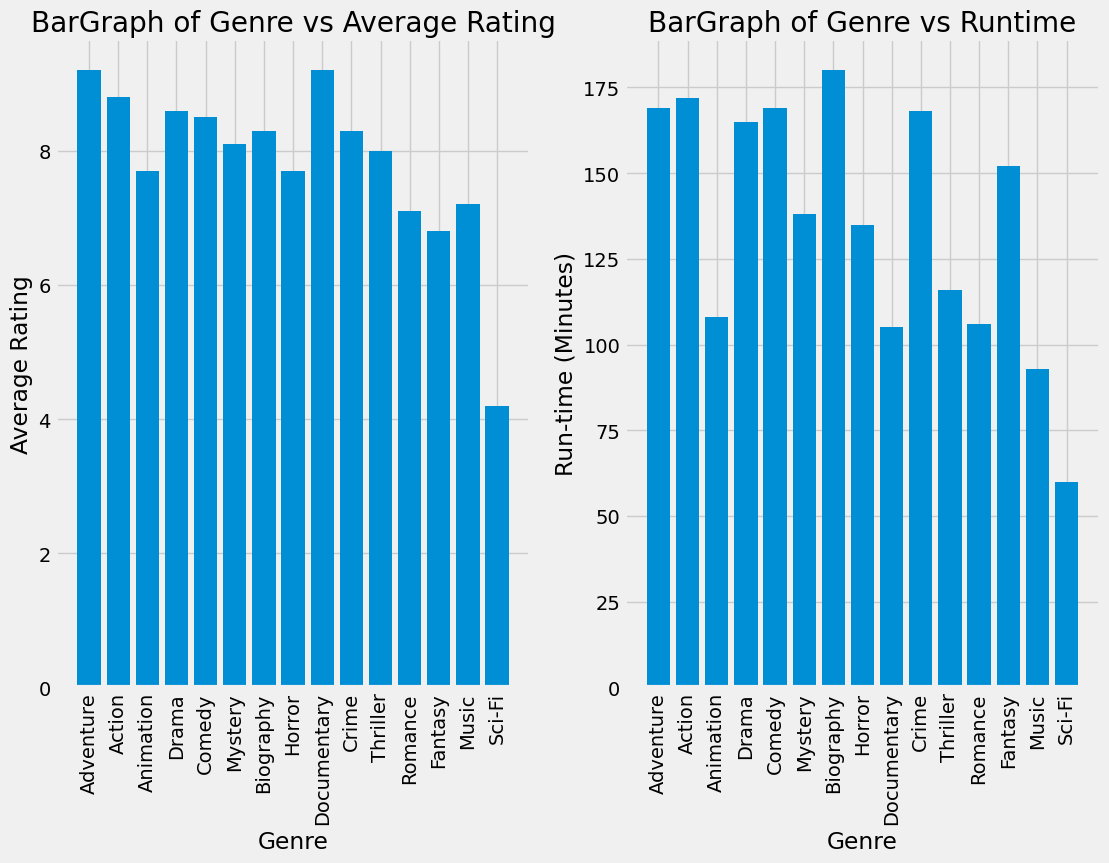

In [39]:
plt.style.use("fivethirtyeight")

fig, ax = plt.subplots(nrows=1, ncols=2, figsize = (12,8))

ax[0].bar(merged_movies_analysis_df["modified_genres"],merged_movies_analysis_df["averagerating"])
ax[0].tick_params(axis="x", labelrotation= 90)
ax[0].set_xlabel("Genre")
ax[0].set_ylabel("Average Rating")
ax[0].set_title("BarGraph of Genre vs Average Rating")
ax[1].bar(merged_movies_analysis_df["modified_genres"],merged_movies_analysis_df["runtime_minutes"])
ax[1].tick_params(axis="x", labelrotation= 90)
ax[1].set_xlabel("Genre")
ax[1].set_ylabel("Run-time (Minutes)")
ax[1].set_title("BarGraph of Genre vs Runtime");
plt.show()

It is evident from the diagram above that adventure movies and documentaries are tied as having the highest average rating. This is closely followed by action, drama and comedy movies respectively. On the other hand, when it comes to run time, biographies had the longest run time followed by action movies. Adventure and crime came in third with almost similar run times. Something interesting to note is that sci-fi movies had the least average rating and run time. This then begs the question, is there any relationship between average rating and runtime?

To try and answer this question, we will first begin by plotting a scatter diagram and observing if there is any relationship.


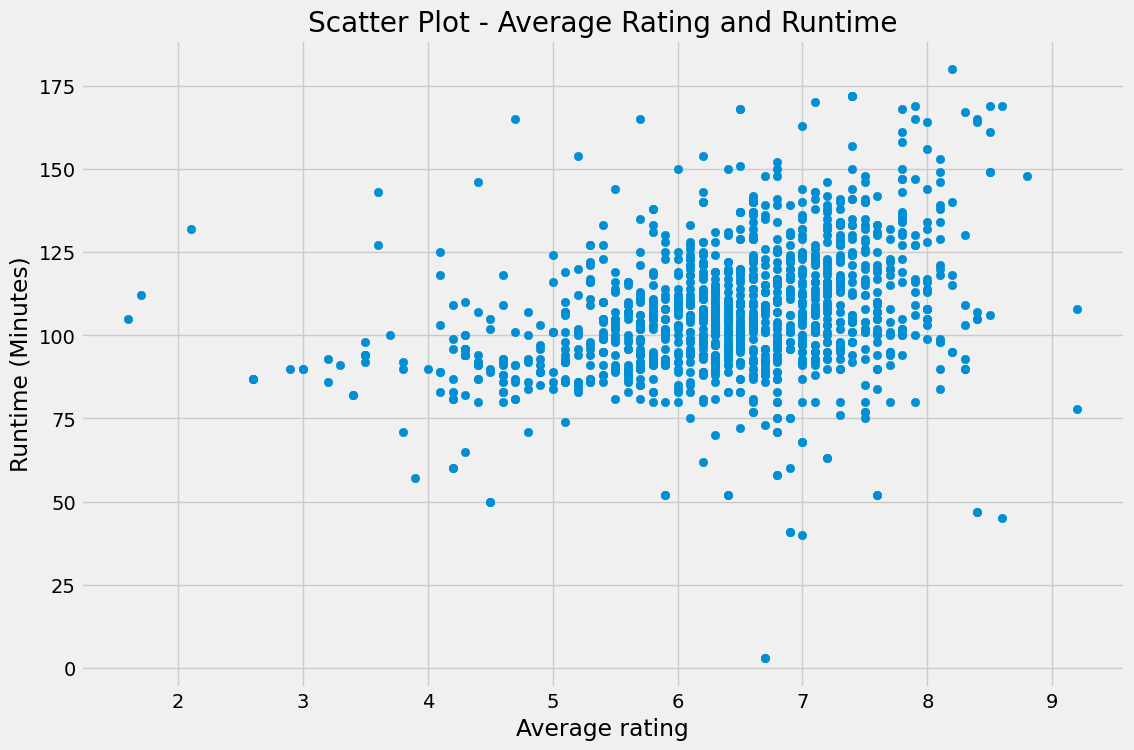

In [40]:
# Scatter plot of average rating and runtime minutes


fig, ax = plt.subplots(figsize = (12,8))

ax.scatter(merged_movies_analysis_df["averagerating"],merged_movies_analysis_df["runtime_minutes"])
ax.set_xlabel("Average rating")
ax.set_ylabel("Runtime (Minutes)")
ax.set_title("Scatter Plot - Average Rating and Runtime");
plt.show()

From the scatter plot above, there does not seem to be a linear or even exponential relationship between runtime and average rating. However, we do observe that majority of the movies, regardless of genr,e tend to be rated between 5 and 8 with a run time of roughly between 75 and 150 mins. Thus, we will try and fit a linear model to check if indeed our assumption is correct. Please note, there are a few outliers observed which we will keep for our analysis.

## Fitting a linear regression model

We will start by plotting the two variables in question i.e. average rating and runtime to check if they are normally distributed.

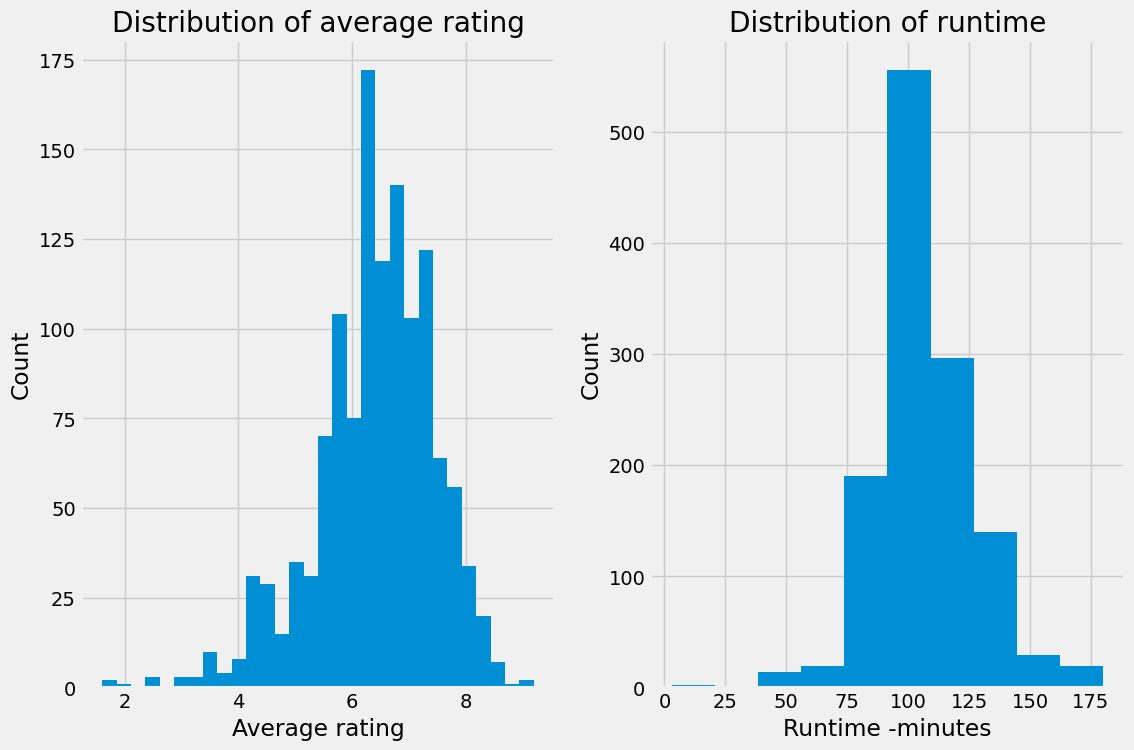

In [41]:
#Side by side plots to check for mormality of the variables

fig, ax = plt.subplots(nrows=1, ncols=2, figsize = (12,8))

ax[0].hist(merged_movies_analysis_df["averagerating"], bins = 30)
ax[0].set_xlabel("Average rating")
ax[0].set_ylabel("Count")
ax[0].set_title("Distribution of average rating")
ax[1].hist(merged_movies_analysis_df["runtime_minutes"])

ax[1].set_xlabel("Runtime -minutes")
ax[1].set_ylabel("Count")
ax[1].set_title("Distribution of runtime");
plt.show()

Average rating looks to be slightly negatively skewed but it's close enough to pass for a normal distribution. Runtime on the other hand, does look normally distributed. Hence no transformation of the variables is needed. Thus, we'll fit a simple linear model with runtime being the independent variable and average rating being the dependent variable.

In [42]:
X = merged_movies_analysis_df["runtime_minutes"]
y = merged_movies_analysis_df["averagerating"]

model = sm.OLS(endog =y, exog =sm.add_constant(X))
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:          averagerating   R-squared:                       0.104
Model:                            OLS   Adj. R-squared:                  0.103
Method:                 Least Squares   F-statistic:                     146.1
Date:                Thu, 31 Oct 2024   Prob (F-statistic):           6.70e-32
Time:                        01:12:16   Log-Likelihood:                -1790.8
No. Observations:                1264   AIC:                             3586.
Df Residuals:                    1262   BIC:                             3596.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               4.5940      0.153     

Overall the model and coefficients are statistically significant, with all p-values well below a standard alpha of 0.05. The R-squared value is about 0.104 i.e. 10.4% of the variance in the average rating can be explained by run time. The intercept is about 4.6, meaning that for a movie with run time of 0 mins, we would expect a rating of at least 4.6 i.e. a  movie is guaranteed at least 4.6 without being watched. The runtime coeeficient  is about 0.02, meaning that for each additional minute spent watching the movie, we would expect an increase in rating by 0.02. 



### 2. Evaluate the impact of release date on genre ratings to identify trends and pinpoint which genres consistently receive high ratings over time.

#### 2.1 Effect of release month on ratings for all movies

To get the impact of the release date particularly in relation to the time of the year, we shall continue to use the 'merged_movies_analysis_df' dataframe which we shall rename to release_date_df

In [43]:
release_date_df = merged_movies_analysis_df

For purposes of getting the time of the year in which a certain movie was released, we shall only grab the month date from the year of release of a movie.

Extract month from release date by converting it to datetime object.

In [44]:
# Extract the month from release_date
release_date_df['release_date'] = pd.to_datetime(release_date_df['release_date'], errors='coerce')
release_date_df['release_month'] = release_date_df['release_date'].dt.month

Now, calculate the average rating for all the movies according to the month that it was released.

In [45]:
# Calculate average rating per release month
average_rating_per_month = release_date_df.groupby('release_month')['averagerating'].mean()

Now plot the graph that shows the impact of release month on the movie ratings.

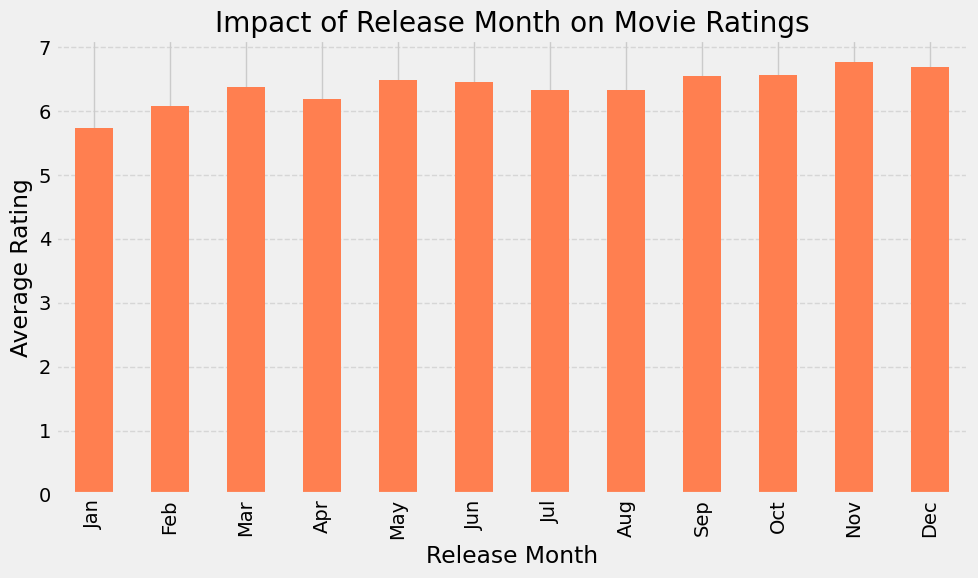

In [46]:
# Plotting the bar graph
plt.figure(figsize=(10, 6))
average_rating_per_month.plot(kind='bar', color='coral')
plt.title('Impact of Release Month on Movie Ratings')
plt.xlabel('Release Month')
plt.ylabel('Average Rating')
plt.xticks(ticks=range(12), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


From the findings, it is clear that January is the month where the ratings across all movies irrespective of the movie type is the lowest.

#### 2.2 Effect of release month on ratings based on genre of a movie

We now want to do a deep dive and look at the impact of release month on the rating of a movie based on the genre that it falls into.

We will start by calculating the average rating per genre based on the month of the year.

In [47]:
# Calculate average rating per genre and month
monthly_genre_rating = release_date_df.groupby(['release_month', 'modified_genres'])['averagerating'].mean().reset_index()

Next, we go ahead to plot the graph to show the ratings across different genres.

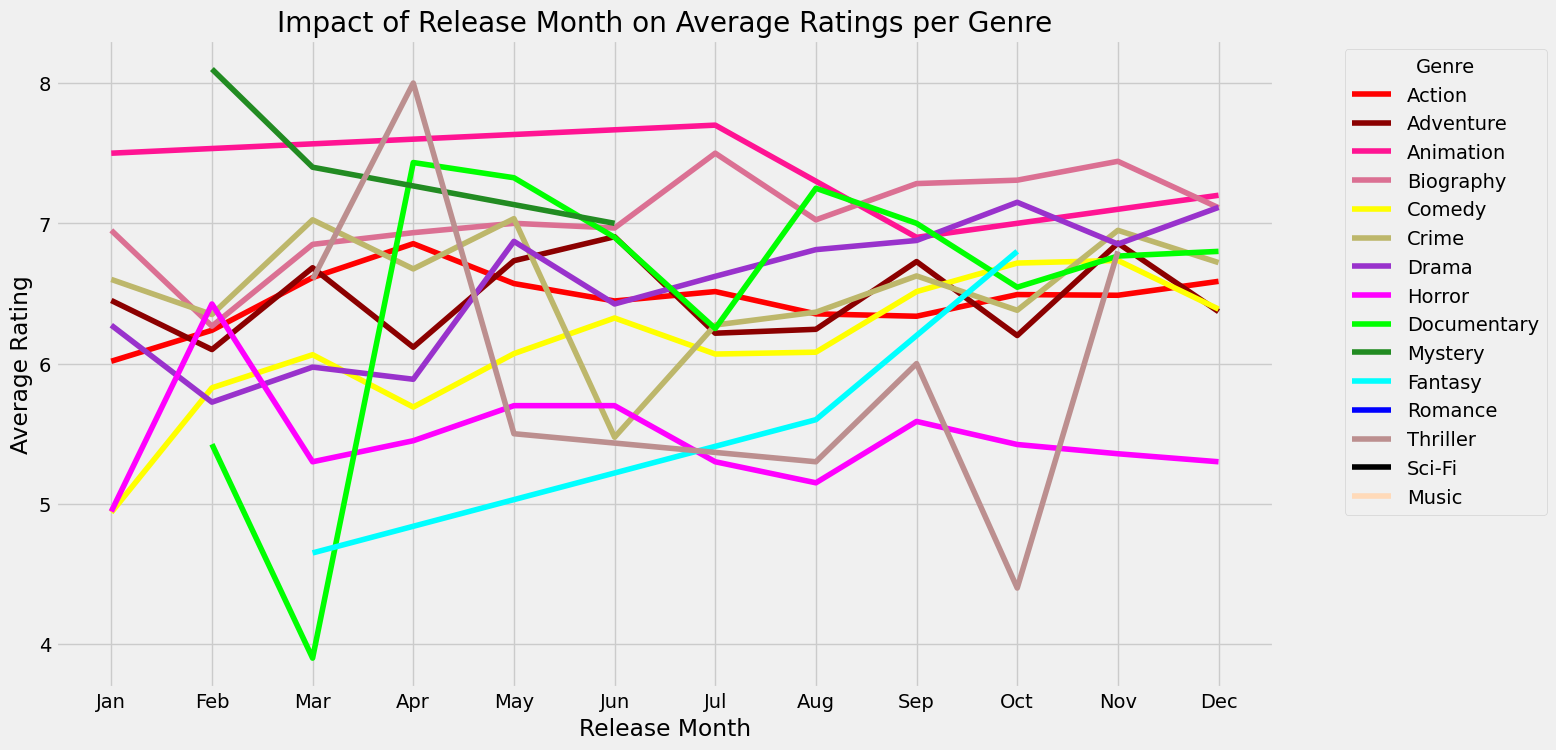

In [48]:
# Create a custom color palette
custom_palette = sns.color_palette(["#FF0000", "#8B0000", "#FF1493", "#DB7093", "#FFFF00", "#BDB76B", "#9932CC", "#FF00FF", "#00FF00", "#228B22", "#00FFFF", "#0000FF", "#BC8F8F", "#000000", "#FFDAB9"]
)

# Set up the plot
plt.figure(figsize=(14, 8))
sns.lineplot(data=monthly_genre_rating, x='release_month', y='averagerating', hue='modified_genres', palette= custom_palette)

# Customize the plot
plt.title('Impact of Release Month on Average Ratings per Genre')
plt.xlabel('Release Month')
plt.ylabel('Average Rating')
plt.xticks(range(1, 13), 
           ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.legend(title='Genre', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)

plt.show()

From the visualization above, it is clear that Adventure, Action, Drama and Animation movies maintain somewhat the same average ratings throughout the year. However, Documentaries do not get a good rating when released around February and March. On the other hand, Thriller moves garner very high ratings when released in April and very low ratings when released in October.

### 3.Assess directors' performance to determine which has achieved the highest return on investment within specific genres.

#### 4.1. Distinguishing studios with box office releases from those without

In [49]:
# Get unique studios
merged_movies_analysis_df['studio'].unique()

array(['BV', 'WB', 'P/DW', 'Sum.', 'Par.', 'Uni.', 'Fox', 'Sony', 'FoxS',
       'SGem', 'WB (NL)', 'LGF', 'MBox', 'W/Dim.', 'Focus', 'MGM',
       'Over.', 'Mira.', 'CBS', 'SPC', 'Free', '3D', 'RAtt.', 'Wein.',
       'Rela.', 'Magn.', 'App.', 'Drft.', 'IFC', 'Relbig.', 'Viv.',
       'Eros', 'ATO', 'Anch.', 'Gold.', 'Strand', 'FD', 'TriS', 'ORF',
       'Jan.', 'Osci.', 'OMNI/FSR', 'ParV', 'P4', 'LG/S', 'RTWC', 'LD',
       'MNE', 'A24', 'PH', 'EOne', 'CE', 'DR', 'EC', 'BG', 'PFR', 'BST',
       'FCW', 'UTV', 'STX', 'Yash', 'BH Tilt', 'GrtIndia', 'Neon',
       'Affirm', 'Studio 8', 'Annapurna', 'Global Road', 'Amazon', 'VE'],
      dtype=object)

#### This Studios are those ill be working on 

BV - Buena Vista (Disney),
WB - Warner Bros.,
P/DW - Paramount / DreamWorks,
Sum. - Summit Entertainment,
Par. - Paramount Pictures,
Uni. - Universal Pictures,
Fox - 20th Century Fox,
Sony - Sony Pictures,
FoxS - Fox Searchlight (often independent but has box-office releases),
SGem - Screen Gems,
WB (NL) - Warner Bros. New Line Cinema,
LGF - Lionsgate Films,
Focus - Focus Features,
MGM - Metro-Goldwyn-Mayer,
Over. - Overbrook Entertainment,
W/Dim. - Walt Disney / Dimension Films,

These studios are the most likely associated with mainstream, large-scale box office releases.

In [50]:
# filtering 'studio' column

box_office_studios = [
    'BV', 'WB', 'P/DW', 'Sum.', 'Par.', 'Uni.', 'Fox', 'Sony', 'FoxS', 
    'SGem', 'WB (NL)', 'LGF', 'Focus', 'MGM', 'Over.', 'W/Dim.'
]

merged_movies_directors_df = merged_movies_analysis_df[merged_movies_analysis_df['studio'].isin(box_office_studios)]

merged_movies_directors_df.head(10)

,Movie_title,studio,domestic_gross_x,foreign_gross,year,start_year,runtime_minutes,genres,averagerating,numvotes,primary_name,primary_profession,id,release_date,production_budget,domestic_gross_y,worldwide_gross,modified_genres,release_month
0,Toy Story 3,BV,415000000.0,652000000,2010,2010.0,103.0,"Adventure,Animation,Comedy",8.3,682218.0,Lee Unkrich,"editorial_department,editor,miscellaneous",47.0,2010-06-18,"$200,000,000","$415,004,880","$1,068,879,522",Adventure,6
3,Inception,WB,292600000.0,535700000,2010,2010.0,148.0,"Action,Adventure,Sci-Fi",8.8,1841066.0,Christopher Nolan,"writer,producer,director",38.0,2010-07-16,"$160,000,000","$292,576,195","$835,524,642",Action,7
4,Shrek Forever After,P/DW,238700000.0,513900000,2010,2010.0,93.0,"Adventure,Animation,Comedy",6.3,167532.0,Mike Mitchell,"actor,director,writer",27.0,2010-05-21,"$165,000,000","$238,736,787","$756,244,673",Adventure,5
5,The Twilight Saga: Eclipse,Sum.,300500000.0,398000000,2010,2010.0,124.0,"Adventure,Drama,Fantasy",5.0,211733.0,David Slade,"producer,director,writer",53.0,2010-06-30,"$68,000,000","$300,531,751","$706,102,828",Adventure,6
6,Iron Man 2,Par.,312400000.0,311500000,2010,2010.0,124.0,"Action,Adventure,Sci-Fi",7.0,657690.0,Jon Favreau,"producer,actor,miscellaneous",15.0,2010-05-07,"$170,000,000","$312,433,331","$621,156,389",Action,5
7,Tangled,BV,200800000.0,391000000,2010,2010.0,100.0,"Adventure,Animation,Comedy",7.8,366366.0,Byron Howard,"animation_department,director,actor",15.0,2010-11-24,"$260,000,000","$200,821,936","$586,477,240",Adventure,11
8,Tangled,BV,200800000.0,391000000,2010,2010.0,100.0,"Adventure,Animation,Comedy",7.8,366366.0,Nathan Greno,"actor,art_department,director",15.0,2010-11-24,"$260,000,000","$200,821,936","$586,477,240",Adventure,11
9,Despicable Me,Uni.,251500000.0,291600000,2010,2010.0,95.0,"Animation,Comedy,Family",7.7,464511.0,Chris Renaud,"producer,actor,director",50.0,2010-07-09,"$69,000,000","$251,513,985","$543,464,573",Animation,7
10,Despicable Me,Uni.,251500000.0,291600000,2010,2010.0,95.0,"Animation,Comedy,Family",7.7,464511.0,Pierre Coffin,"actor,director,producer",50.0,2010-07-09,"$69,000,000","$251,513,985","$543,464,573",Animation,7
11,How to Train Your Dragon,P/DW,217600000.0,277300000,2010,2010.0,98.0,"Action,Adventure,Animation",8.1,611299.0,Dean DeBlois,"writer,animation_department,director",30.0,2010-03-26,"$165,000,000","$217,581,232","$494,870,992",Action,3


In [51]:
# concise summary of our dataframe
#merged_movies_directors_df.info()
merged_movies_analysis_df["modified_genres"].value_counts()

modified_genres
Action         373
Comedy         235
Drama          191
Adventure      172
Biography       87
Horror          71
Crime           67
Documentary     40
Animation       10
Thriller         7
Fantasy          4
Mystery          3
Sci-Fi           2
Romance          1
Music            1
Name: count, dtype: int64

#### Finding the Top rated Movies

Retriving the top-rated movies with an average rating of 8.0 or higher. then  selecting the top 50 movies based on their average rating and display the first 10 entries. 

In [52]:
# Filtering the movie rating with a rating of 8 and above
top_rated_movies = merged_movies_directors_df[merged_movies_directors_df['averagerating'] >= 8.0].nlargest(50, 'averagerating')
top_rated_movies.head(10)


,Movie_title,studio,domestic_gross_x,foreign_gross,year,start_year,runtime_minutes,genres,averagerating,numvotes,primary_name,primary_profession,id,release_date,production_budget,domestic_gross_y,worldwide_gross,modified_genres,release_month
3,Inception,WB,292600000.0,535700000,2010,2010.0,148.0,"Action,Adventure,Sci-Fi",8.8,1841066.0,Christopher Nolan,"writer,producer,director",38.0,2010-07-16,"$160,000,000","$292,576,195","$835,524,642",Action,7
1792,Interstellar,Par.,188000000.0,489400000,2014,2014.0,169.0,"Adventure,Drama,Sci-Fi",8.6,1299334.0,Christopher Nolan,"writer,producer,director",32.0,2014-11-05,"$165,000,000","$188,017,894","$666,379,375",Adventure,11
3863,Kin,LGF,5700000.0,4300000,2018,2012.0,45.0,"Drama,Music",8.6,46.0,Rachel Lambert,"director,actress,writer",88.0,2018-08-31,"$30,000,000","$5,718,096","$10,096,821",Drama,8
3682,Avengers: Infinity War,BV,678800000.0,"1,369.5",2018,2018.0,149.0,"Action,Adventure,Sci-Fi",8.5,670926.0,Anthony Russo,"producer,director,writer",7.0,2018-04-27,"$300,000,000","$678,815,482","$2,048,134,200",Action,4
3683,Avengers: Infinity War,BV,678800000.0,"1,369.5",2018,2018.0,149.0,"Action,Adventure,Sci-Fi",8.5,670926.0,Joe Russo,"producer,director,writer",7.0,2018-04-27,"$300,000,000","$678,815,482","$2,048,134,200",Action,4
3301,Coco,BV,209700000.0,597400000,2017,2017.0,105.0,"Adventure,Animation,Comedy",8.4,277194.0,Adrian Molina,"writer,miscellaneous,animation_department",2.0,2017-11-22,"$175,000,000","$209,726,015","$798,008,101",Adventure,11
894,The Dark Knight Rises,WB,448100000.0,636800000,2012,2012.0,164.0,"Action,Thriller",8.4,1387769.0,Christopher Nolan,"writer,producer,director",11.0,2012-07-20,"$275,000,000","$448,139,099","$1,084,439,099",Action,7
3300,Coco,BV,209700000.0,597400000,2017,2017.0,105.0,"Adventure,Animation,Comedy",8.4,277194.0,Lee Unkrich,"editorial_department,editor,miscellaneous",2.0,2017-11-22,"$175,000,000","$209,726,015","$798,008,101",Adventure,11
51,Red,Sum.,90400000.0,108600000,2010,2014.0,107.0,Drama,8.4,8.0,Jay Abello,"camera_department,cinematographer,director",63.0,2010-10-15,"$60,000,000","$90,380,162","$196,439,693",Drama,10
3715,Green Book,Uni.,85100000.0,234700000,2018,2018.0,130.0,"Biography,Comedy,Drama",8.3,204972.0,Peter Farrelly,"producer,writer,director",71.0,2018-11-16,"$23,000,000","$85,080,171","$322,034,439",Biography,11


 These movies represent the highest-rated entries in the  dataset, sorted to showcase the most highly rated films at the top.

#### Top 10 most frequently occurring directors among the top-rated movies

In [53]:
 # Finding the top 10 most appearing directors in these top-rated movies
top_directors = top_rated_movies['primary_name'].value_counts().head(10).index
top_rated_movies_top_directors = top_rated_movies[top_rated_movies['primary_name'].isin(top_directors)]
top_rated_movies_top_directors.head(10) 

,Movie_title,studio,domestic_gross_x,foreign_gross,year,start_year,runtime_minutes,genres,averagerating,numvotes,primary_name,primary_profession,id,release_date,production_budget,domestic_gross_y,worldwide_gross,modified_genres,release_month
3,Inception,WB,292600000.0,535700000,2010,2010.0,148.0,"Action,Adventure,Sci-Fi",8.8,1841066.0,Christopher Nolan,"writer,producer,director",38.0,2010-07-16,"$160,000,000","$292,576,195","$835,524,642",Action,7
1792,Interstellar,Par.,188000000.0,489400000,2014,2014.0,169.0,"Adventure,Drama,Sci-Fi",8.6,1299334.0,Christopher Nolan,"writer,producer,director",32.0,2014-11-05,"$165,000,000","$188,017,894","$666,379,375",Adventure,11
3863,Kin,LGF,5700000.0,4300000,2018,2012.0,45.0,"Drama,Music",8.6,46.0,Rachel Lambert,"director,actress,writer",88.0,2018-08-31,"$30,000,000","$5,718,096","$10,096,821",Drama,8
3682,Avengers: Infinity War,BV,678800000.0,"1,369.5",2018,2018.0,149.0,"Action,Adventure,Sci-Fi",8.5,670926.0,Anthony Russo,"producer,director,writer",7.0,2018-04-27,"$300,000,000","$678,815,482","$2,048,134,200",Action,4
3683,Avengers: Infinity War,BV,678800000.0,"1,369.5",2018,2018.0,149.0,"Action,Adventure,Sci-Fi",8.5,670926.0,Joe Russo,"producer,director,writer",7.0,2018-04-27,"$300,000,000","$678,815,482","$2,048,134,200",Action,4
3301,Coco,BV,209700000.0,597400000,2017,2017.0,105.0,"Adventure,Animation,Comedy",8.4,277194.0,Adrian Molina,"writer,miscellaneous,animation_department",2.0,2017-11-22,"$175,000,000","$209,726,015","$798,008,101",Adventure,11
894,The Dark Knight Rises,WB,448100000.0,636800000,2012,2012.0,164.0,"Action,Thriller",8.4,1387769.0,Christopher Nolan,"writer,producer,director",11.0,2012-07-20,"$275,000,000","$448,139,099","$1,084,439,099",Action,7
3300,Coco,BV,209700000.0,597400000,2017,2017.0,105.0,"Adventure,Animation,Comedy",8.4,277194.0,Lee Unkrich,"editorial_department,editor,miscellaneous",2.0,2017-11-22,"$175,000,000","$209,726,015","$798,008,101",Adventure,11
51,Red,Sum.,90400000.0,108600000,2010,2014.0,107.0,Drama,8.4,8.0,Jay Abello,"camera_department,cinematographer,director",63.0,2010-10-15,"$60,000,000","$90,380,162","$196,439,693",Drama,10
0,Toy Story 3,BV,415000000.0,652000000,2010,2010.0,103.0,"Adventure,Animation,Comedy",8.3,682218.0,Lee Unkrich,"editorial_department,editor,miscellaneous",47.0,2010-06-18,"$200,000,000","$415,004,880","$1,068,879,522",Adventure,6


In [54]:
# Group by director and calculate their average movie rating
director_ratings = top_rated_movies.groupby('primary_name')['averagerating'].mean().reset_index()

director_ratings.columns = ['Director', 'Average_Rating']

# Sort by average rating to see top directors
top_director_ratings = director_ratings.sort_values(by='Average_Rating', ascending=False)
top_director_ratings.head(10)

,Director,Average_Rating
27,Rachel Lambert,8.60
6,Christopher Nolan,8.60
2,Anthony Russo,8.50
18,Joe Russo,8.50
16,Jay Abello,8.40
0,Adrian Molina,8.40
19,Lee Unkrich,8.35
32,Sarah Morris,8.30
26,Peter Farrelly,8.30
29,Richard Dailey,8.30


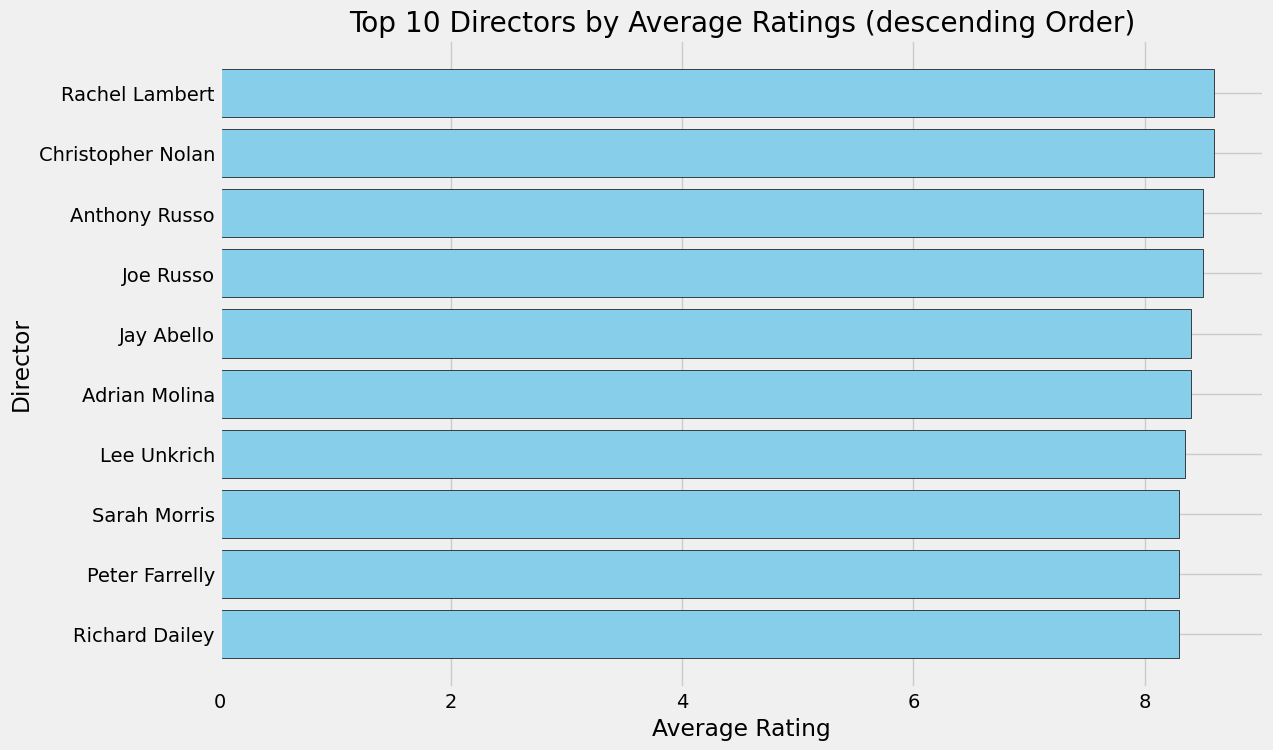

In [55]:
# plotting
top_director_ratings = top_director_ratings.head(10)
# Bar plot
plt.figure(figsize=(12, 8))
plt.barh(top_director_ratings['Director'], top_director_ratings['Average_Rating'], color='skyblue', edgecolor='black')
plt.xlabel('Average Rating')
plt.ylabel('Director')
plt.title('Top 10 Directors by Average Ratings (descending Order)')
plt.gca().invert_yaxis()
plt.show()

This visualization is useful for identifying directors with consistently high viewer ratings, which could be a strong indicator of quality and reliability in filmmaking.

#### Calculating the ROI  for the top Directors

##### Calculating ROI For the best performing Directors

In this part we ensure that we get rid of the dollar sign and the commas to be able to run mathematical operations on the data 

In [56]:
# Mathematical operations
# production_budget' and 'worldwide_gross' columns
top_rated_movies['domestic_gross_y'] = pd.to_numeric(top_rated_movies['domestic_gross_y'].replace(r'[\$,]', '', regex=True), errors='coerce')
top_rated_movies['worldwide_gross'] = pd.to_numeric(top_rated_movies['worldwide_gross'].replace(r'[\$,]', '', regex=True), errors='coerce')
top_rated_movies['production_budget'] = pd.to_numeric(top_rated_movies['production_budget'].replace(r'[\$,]', '', regex=True), errors='coerce')

In [57]:
top_rated_movies['ROI'] = (top_rated_movies['worldwide_gross'] + top_rated_movies['domestic_gross_y']- top_rated_movies['production_budget']) / top_rated_movies['production_budget']
    
top_rated_movies.head(10)

,Movie_title,studio,domestic_gross_x,foreign_gross,year,start_year,runtime_minutes,genres,averagerating,numvotes,primary_name,primary_profession,id,release_date,production_budget,domestic_gross_y,worldwide_gross,modified_genres,release_month,ROI
3,Inception,WB,292600000.0,535700000,2010,2010.0,148.0,"Action,Adventure,Sci-Fi",8.8,1841066.0,Christopher Nolan,"writer,producer,director",38.0,2010-07-16,160000000,292576195,835524642,Action,7,6.050630
1792,Interstellar,Par.,188000000.0,489400000,2014,2014.0,169.0,"Adventure,Drama,Sci-Fi",8.6,1299334.0,Christopher Nolan,"writer,producer,director",32.0,2014-11-05,165000000,188017894,666379375,Adventure,11,4.178165
3863,Kin,LGF,5700000.0,4300000,2018,2012.0,45.0,"Drama,Music",8.6,46.0,Rachel Lambert,"director,actress,writer",88.0,2018-08-31,30000000,5718096,10096821,Drama,8,-0.472836
3682,Avengers: Infinity War,BV,678800000.0,"1,369.5",2018,2018.0,149.0,"Action,Adventure,Sci-Fi",8.5,670926.0,Anthony Russo,"producer,director,writer",7.0,2018-04-27,300000000,678815482,2048134200,Action,4,8.089832
3683,Avengers: Infinity War,BV,678800000.0,"1,369.5",2018,2018.0,149.0,"Action,Adventure,Sci-Fi",8.5,670926.0,Joe Russo,"producer,director,writer",7.0,2018-04-27,300000000,678815482,2048134200,Action,4,8.089832
3301,Coco,BV,209700000.0,597400000,2017,2017.0,105.0,"Adventure,Animation,Comedy",8.4,277194.0,Adrian Molina,"writer,miscellaneous,animation_department",2.0,2017-11-22,175000000,209726015,798008101,Adventure,11,4.758481
894,The Dark Knight Rises,WB,448100000.0,636800000,2012,2012.0,164.0,"Action,Thriller",8.4,1387769.0,Christopher Nolan,"writer,producer,director",11.0,2012-07-20,275000000,448139099,1084439099,Action,7,4.573012
3300,Coco,BV,209700000.0,597400000,2017,2017.0,105.0,"Adventure,Animation,Comedy",8.4,277194.0,Lee Unkrich,"editorial_department,editor,miscellaneous",2.0,2017-11-22,175000000,209726015,798008101,Adventure,11,4.758481
51,Red,Sum.,90400000.0,108600000,2010,2014.0,107.0,Drama,8.4,8.0,Jay Abello,"camera_department,cinematographer,director",63.0,2010-10-15,60000000,90380162,196439693,Drama,10,3.780331
3715,Green Book,Uni.,85100000.0,234700000,2018,2018.0,130.0,"Biography,Comedy,Drama",8.3,204972.0,Peter Farrelly,"producer,writer,director",71.0,2018-11-16,23000000,85080171,322034439,Biography,11,16.700635


The movies by Christopher Nolan and the Russo brothers seem to be safe bets financially and critically.

Rachel Lambert's "Kin," despite having a high average rating, did not perform well financially.

Studios like WB and BV are associated with high-grossing movies.

In [58]:
#  Calculate Average ROI per Director
director_roi = top_rated_movies.groupby('primary_name')['ROI'].mean().reset_index()
director_roi.columns = ['Director', 'Average_ROI']

#Merging Director ratings with Director ROI
director_comparison = pd.merge(director_ratings, director_roi, on='Director')
director_comparison_sorted = director_comparison.sort_values(by=['Average_Rating', 'Average_ROI'], ascending=False)


# Display top 10 directors by rating and ROI
print(director_comparison_sorted.head(10))

             Director  Average_Rating  Average_ROI
6   Christopher Nolan            8.60     4.933936
27     Rachel Lambert            8.60    -0.472836
2       Anthony Russo            8.50     8.089832
18          Joe Russo            8.50     8.089832
0       Adrian Molina            8.40     4.758481
16         Jay Abello            8.40     3.780331
19        Lee Unkrich            8.35     5.588951
29     Richard Dailey            8.30    31.776784
26     Peter Farrelly            8.30    16.700635
32       Sarah Morris            8.30     6.012662


While there are directors with high average ratings, not all translate to high ROI. For instance, Christopher Nolan has a solid rating of 8.60 with a positive ROI of 4.93.

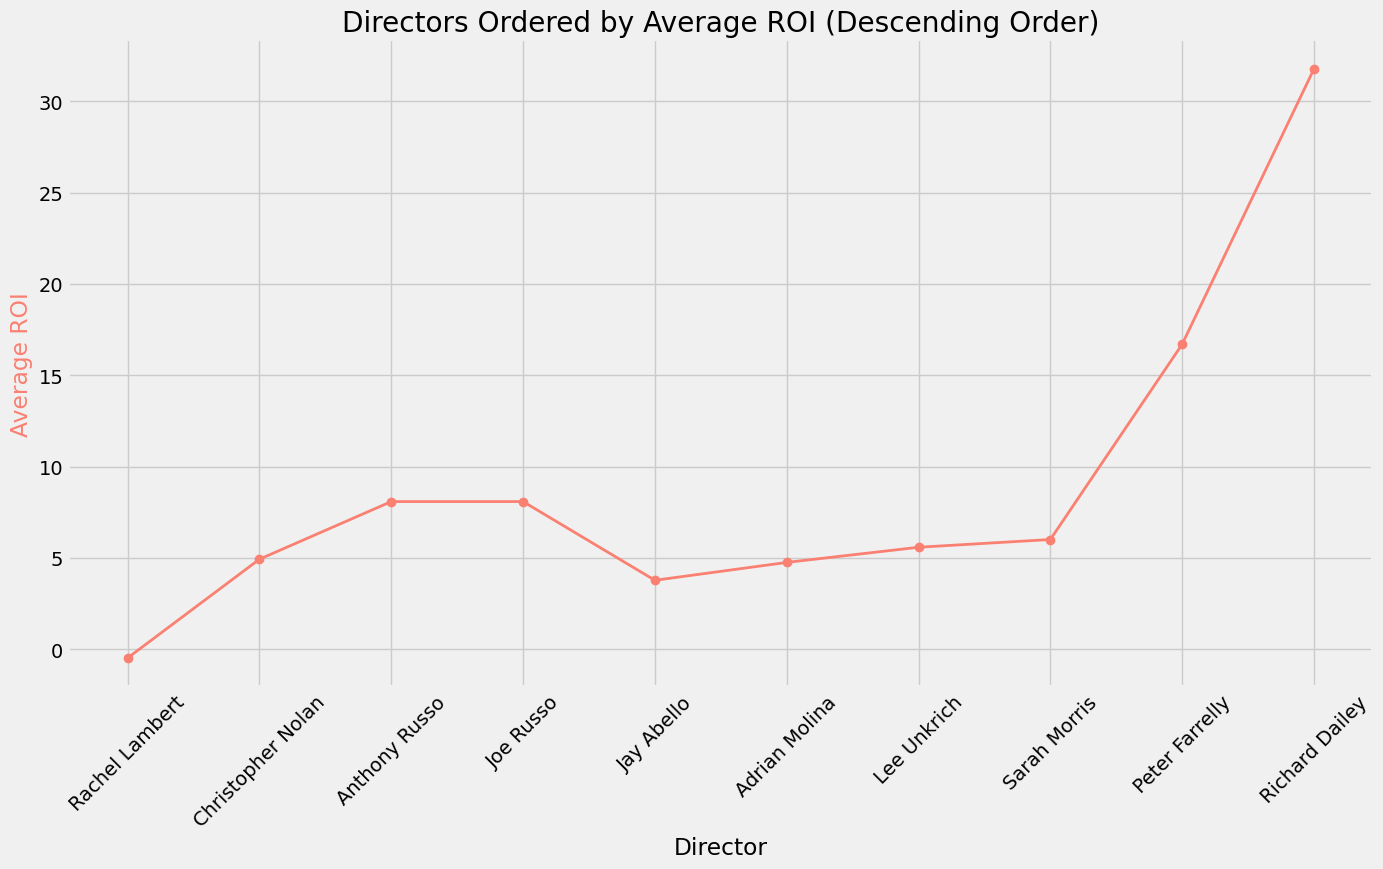

In [59]:
# Sort directors by Average ROI in 
top_directors = director_comparison.sort_values(by='Average_Rating', ascending=False).head(10)

# Create the line plot for Average ROI
plt.figure(figsize=(15, 8))
plt.plot(top_directors['Director'], top_directors['Average_ROI'], color='salmon', marker='o', linestyle='-', linewidth=2)

# Adding labels and title
plt.ylabel('Average ROI', color='salmon')
plt.xlabel('Director')
plt.title("Directors Ordered by Average ROI (Descending Order)")
plt.xticks(rotation=45)
plt.grid(True) 
plt.show()

This analysis reveals that although Christopher Nolan and Rachel Lambert share the same average rating, their return on investment (ROI) varies significantly, with Lambert experiencing a negative ROI. Richard Dailey stands out with the highest ROI, even though his average rating is slightly lower. This highlights the  fact that average ratings do not always directly correlate with financial returns.


In [60]:

top_rated_movies.head()

,Movie_title,studio,domestic_gross_x,foreign_gross,year,start_year,runtime_minutes,genres,averagerating,numvotes,primary_name,primary_profession,id,release_date,production_budget,domestic_gross_y,worldwide_gross,modified_genres,release_month,ROI
3,Inception,WB,292600000.0,535700000,2010,2010.0,148.0,"Action,Adventure,Sci-Fi",8.8,1841066.0,Christopher Nolan,"writer,producer,director",38.0,2010-07-16,160000000,292576195,835524642,Action,7,6.050630
1792,Interstellar,Par.,188000000.0,489400000,2014,2014.0,169.0,"Adventure,Drama,Sci-Fi",8.6,1299334.0,Christopher Nolan,"writer,producer,director",32.0,2014-11-05,165000000,188017894,666379375,Adventure,11,4.178165
3863,Kin,LGF,5700000.0,4300000,2018,2012.0,45.0,"Drama,Music",8.6,46.0,Rachel Lambert,"director,actress,writer",88.0,2018-08-31,30000000,5718096,10096821,Drama,8,-0.472836
3682,Avengers: Infinity War,BV,678800000.0,"1,369.5",2018,2018.0,149.0,"Action,Adventure,Sci-Fi",8.5,670926.0,Anthony Russo,"producer,director,writer",7.0,2018-04-27,300000000,678815482,2048134200,Action,4,8.089832
3683,Avengers: Infinity War,BV,678800000.0,"1,369.5",2018,2018.0,149.0,"Action,Adventure,Sci-Fi",8.5,670926.0,Joe Russo,"producer,director,writer",7.0,2018-04-27,300000000,678815482,2048134200,Action,4,8.089832


#### Relationship between ROI , Genre and directos 

Plot a graph to intepret our information

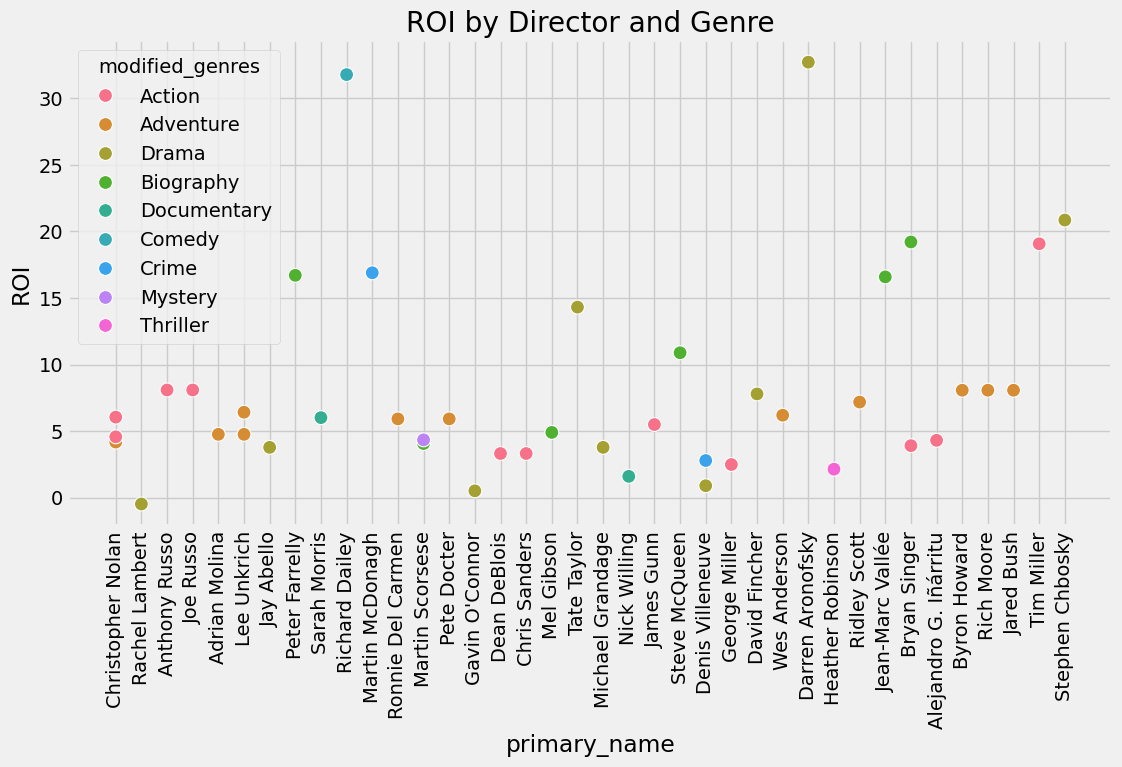

In [61]:
# Plot a graph to intepret our information 
director_avg_roi = top_rated_movies.groupby('primary_name')['ROI'].mean().reset_index()
genre_avg_roi = top_rated_movies.explode('modified_genres').groupby('modified_genres')['ROI']
# Scatter Plot
plt.figure(figsize=(12, 6))
sns.scatterplot(data=top_rated_movies, x='primary_name', y='ROI', hue='modified_genres', s=100)
plt.xticks(rotation=90)
plt.title('ROI by Director and Genre')
plt.show()


This data demonstrates that financial success in the film industry can arise from a range of genres and directors, highlighting that high ratings do not necessarily ensure significant financial returns. Directors such as Christopher Nolan and the Russo brothers are notable for their consistent track record of producing films that are both critically acclaimed and commercially successful.

### 4. Identify directors known for producing highly acclaimed within top-rated genres.

#### a) Identify the top-rated genres

In [62]:
# Filter top-rated genres by mean rating threshold
genre_ratings = merged_movies_analysis_df.groupby("genres")["averagerating"].mean()
top_genres = genre_ratings[genre_ratings >= 7.0].index
top_genres

Index(['Action,Adventure,Animation', 'Action,Adventure,Biography',
       'Action,Biography,Comedy', 'Action,Biography,Drama',
       'Action,Drama,History', 'Action,Drama,Mystery', 'Action,Sci-Fi',
       'Action,Sport', 'Adventure', 'Adventure,Biography,Drama',
       'Adventure,Comedy,Sci-Fi', 'Adventure,Crime,Drama',
       'Adventure,Drama,Sci-Fi', 'Adventure,Drama,Western',
       'Adventure,Fantasy', 'Adventure,Mystery,Sci-Fi',
       'Animation,Comedy,Drama', 'Animation,Comedy,Family',
       'Animation,Drama,Fantasy', 'Biography,Comedy,Drama',
       'Biography,Crime,Drama', 'Biography,Documentary,History',
       'Biography,Drama,History', 'Biography,Drama,Music',
       'Biography,Drama,Musical', 'Biography,Drama,Romance',
       'Biography,Drama,Sport', 'Biography,Drama,Thriller',
       'Crime,Documentary', 'Documentary,War', 'Drama,History,Thriller',
       'Drama,History,War', 'Drama,Music', 'Drama,Mystery',
       'Drama,Mystery,Romance', 'Drama,Mystery,Sci-Fi',
       

#### b) Filter for highly acclaimed Movies
We will consider critically acclaimed movies as movies with a rating above 7/10

In [63]:
# Filter for movies with high ratings
critically_acclaimed_movies = merged_movies_analysis_df[(merged_movies_analysis_df["genres"].isin(top_genres)) & (merged_movies_analysis_df["averagerating"] >= 7.0)]
critically_acclaimed_movies

,Movie_title,studio,domestic_gross_x,foreign_gross,year,start_year,runtime_minutes,genres,averagerating,numvotes,primary_name,primary_profession,id,release_date,production_budget,domestic_gross_y,worldwide_gross,modified_genres,release_month
9,Despicable Me,Uni.,251500000.0,291600000,2010,2010.0,95.0,"Animation,Comedy,Family",7.7,464511.0,Chris Renaud,"producer,actor,director",50.0,2010-07-09,"$69,000,000","$251,513,985","$543,464,573",Animation,7
10,Despicable Me,Uni.,251500000.0,291600000,2010,2010.0,95.0,"Animation,Comedy,Family",7.7,464511.0,Pierre Coffin,"actor,director,producer",50.0,2010-07-09,"$69,000,000","$251,513,985","$543,464,573",Animation,7
11,How to Train Your Dragon,P/DW,217600000.0,277300000,2010,2010.0,98.0,"Action,Adventure,Animation",8.1,611299.0,Dean DeBlois,"writer,animation_department,director",30.0,2010-03-26,"$165,000,000","$217,581,232","$494,870,992",Action,3
12,How to Train Your Dragon,P/DW,217600000.0,277300000,2010,2010.0,98.0,"Action,Adventure,Animation",8.1,611299.0,Chris Sanders,"writer,actor,animation_department",30.0,2010-03-26,"$165,000,000","$217,581,232","$494,870,992",Action,3
33,Shutter Island,Par.,128000000.0,166800000,2010,2010.0,138.0,"Mystery,Thriller",8.1,1005960.0,Martin Scorsese,"producer,director,actor",52.0,2010-02-19,"$80,000,000","$128,012,934","$299,461,782",Mystery,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3764,BlacKkKlansman,Focus,49300000.0,44000000,2018,2018.0,135.0,"Biography,Crime,Drama",7.5,149005.0,Spike Lee,"director,producer,writer",21.0,2018-08-10,"$15,000,000","$49,275,340","$93,017,335",Biography,8
3775,Vice,Annapurna,47800000.0,28200000,2018,2018.0,132.0,"Biography,Comedy,Drama",7.2,72855.0,Adam McKay,"producer,writer,director",100.0,2018-12-25,"$60,000,000","$47,836,282","$70,883,171",Biography,12
3863,Kin,LGF,5700000.0,4300000,2018,2012.0,45.0,"Drama,Music",8.6,46.0,Rachel Lambert,"director,actress,writer",88.0,2018-08-31,"$30,000,000","$5,718,096","$10,096,821",Drama,8
3908,Bilal: A New Breed of Hero,VE,491000.0,1700000,2018,2015.0,105.0,"Action,Adventure,Animation",8.0,16854.0,Ayman Jamal,"producer,director,writer",100.0,2018-02-02,"$30,000,000","$490,973","$648,599",Action,2


#### c) Aggregate by Director
This will help us identify which directors produce top-rated movies within specific genres.

In [64]:
# Group by director and count highly acclaimed works
director_counts = critically_acclaimed_movies.groupby("primary_name").size().sort_values(ascending=False)
top_directors = director_counts.head(10)  # Top 10 directors
top_directors

primary_name
Steven Spielberg     5
Adam McKay           2
Craig Gillespie      2
Damien Chazelle      2
Dean DeBlois         2
Denis Villeneuve     2
Doug Liman           2
Christopher Nolan    2
Chris Sanders        2
Ethan Coen           2
dtype: int64

#### d) Plotting the results

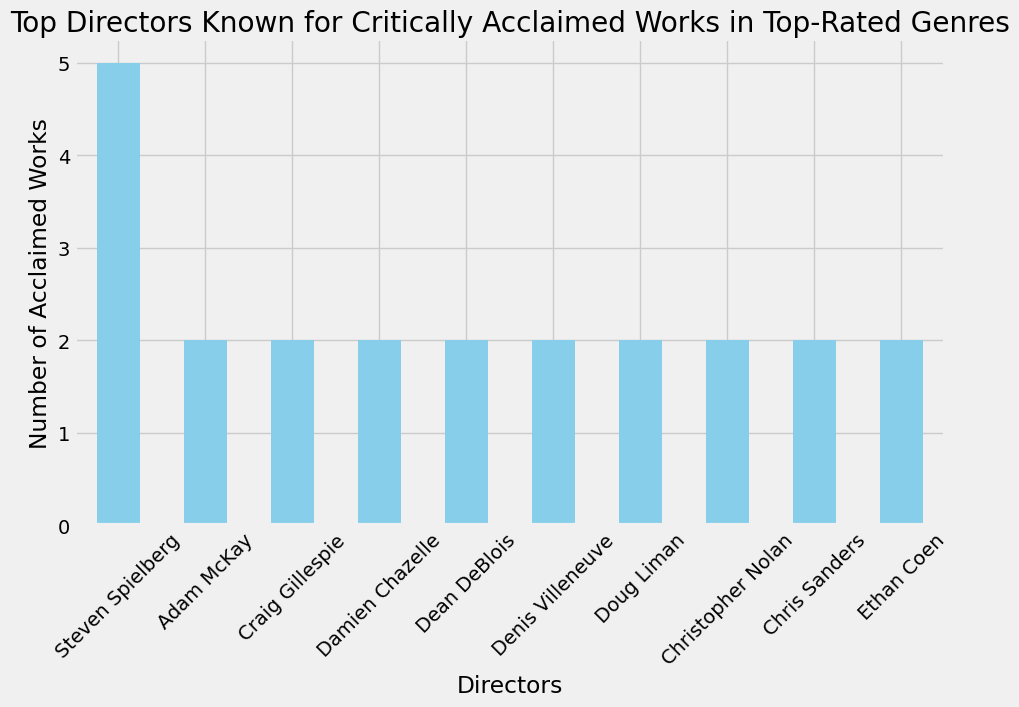

In [65]:
# Plot top directors by the number of acclaimed works
plt.figure(figsize=(10, 6))
top_directors.plot(kind="bar", color="skyblue")
plt.title("Top Directors Known for Critically Acclaimed Works in Top-Rated Genres")
plt.xlabel("Directors")
plt.ylabel("Number of Acclaimed Works")
plt.xticks(rotation=45)
plt.show()

#### 5. Identifying the genre with the highest return on investment based on production costs and box office earnings.
We start by:
* Calculating ROI for each movie, calculate how much profit it made compared to its cost.

* Calculate average ROI per genre.

* Identify Top Genre and rank genres by average ROI to find the top 10.


In [66]:
# converting the objects columns to floats and removing the characters for mathematical operations
merged_movies_analysis_df['domestic_gross_y'] = pd.to_numeric(merged_movies_analysis_df['domestic_gross_y'].replace(r'[\$,]', '', regex=True), errors='coerce')
merged_movies_analysis_df['worldwide_gross'] = pd.to_numeric(merged_movies_analysis_df['worldwide_gross'].replace(r'[\$,]', '', regex=True), errors='coerce')
merged_movies_analysis_df['production_budget'] = pd.to_numeric(merged_movies_analysis_df['production_budget'].replace(r'[\$,]', '', regex=True), errors='coerce')

In [67]:
# Start by adding a new Attribute ROI 
merged_movies_analysis_df["ROI"] = (((merged_movies_analysis_df["worldwide_gross"] - merged_movies_analysis_df["production_budget"]) / merged_movies_analysis_df["production_budget"]) * 100).round(3)
merged_movies_analysis_df.head(3)

,Movie_title,studio,domestic_gross_x,foreign_gross,year,start_year,runtime_minutes,genres,averagerating,numvotes,primary_name,primary_profession,id,release_date,production_budget,domestic_gross_y,worldwide_gross,modified_genres,release_month,ROI
0,Toy Story 3,BV,415000000.0,652000000,2010,2010.0,103.0,"Adventure,Animation,Comedy",8.3,682218.0,Lee Unkrich,"editorial_department,editor,miscellaneous",47.0,2010-06-18,200000000,415004880,1068879522,Adventure,6,434.440
3,Inception,WB,292600000.0,535700000,2010,2010.0,148.0,"Action,Adventure,Sci-Fi",8.8,1841066.0,Christopher Nolan,"writer,producer,director",38.0,2010-07-16,160000000,292576195,835524642,Action,7,422.203
4,Shrek Forever After,P/DW,238700000.0,513900000,2010,2010.0,93.0,"Adventure,Animation,Comedy",6.3,167532.0,Mike Mitchell,"actor,director,writer",27.0,2010-05-21,165000000,238736787,756244673,Adventure,5,358.330


In [68]:
# selecting the primary genre by retaining the first element in genres list
merged_movies_analysis_df["genres"] =merged_movies_analysis_df["genres"].apply(lambda x: x.split(",")[0] if isinstance(x, str) else x)
merged_movies_analysis_df.head(10)

,Movie_title,studio,domestic_gross_x,foreign_gross,year,start_year,runtime_minutes,genres,averagerating,numvotes,primary_name,primary_profession,id,release_date,production_budget,domestic_gross_y,worldwide_gross,modified_genres,release_month,ROI
0,Toy Story 3,BV,415000000.0,652000000,2010,2010.0,103.0,Adventure,8.3,682218.0,Lee Unkrich,"editorial_department,editor,miscellaneous",47.0,2010-06-18,200000000,415004880,1068879522,Adventure,6,434.440
3,Inception,WB,292600000.0,535700000,2010,2010.0,148.0,Action,8.8,1841066.0,Christopher Nolan,"writer,producer,director",38.0,2010-07-16,160000000,292576195,835524642,Action,7,422.203
4,Shrek Forever After,P/DW,238700000.0,513900000,2010,2010.0,93.0,Adventure,6.3,167532.0,Mike Mitchell,"actor,director,writer",27.0,2010-05-21,165000000,238736787,756244673,Adventure,5,358.330
5,The Twilight Saga: Eclipse,Sum.,300500000.0,398000000,2010,2010.0,124.0,Adventure,5.0,211733.0,David Slade,"producer,director,writer",53.0,2010-06-30,68000000,300531751,706102828,Adventure,6,938.387
6,Iron Man 2,Par.,312400000.0,311500000,2010,2010.0,124.0,Action,7.0,657690.0,Jon Favreau,"producer,actor,miscellaneous",15.0,2010-05-07,170000000,312433331,621156389,Action,5,265.386
7,Tangled,BV,200800000.0,391000000,2010,2010.0,100.0,Adventure,7.8,366366.0,Byron Howard,"animation_department,director,actor",15.0,2010-11-24,260000000,200821936,586477240,Adventure,11,125.568
8,Tangled,BV,200800000.0,391000000,2010,2010.0,100.0,Adventure,7.8,366366.0,Nathan Greno,"actor,art_department,director",15.0,2010-11-24,260000000,200821936,586477240,Adventure,11,125.568
9,Despicable Me,Uni.,251500000.0,291600000,2010,2010.0,95.0,Animation,7.7,464511.0,Chris Renaud,"producer,actor,director",50.0,2010-07-09,69000000,251513985,543464573,Animation,7,687.630
10,Despicable Me,Uni.,251500000.0,291600000,2010,2010.0,95.0,Animation,7.7,464511.0,Pierre Coffin,"actor,director,producer",50.0,2010-07-09,69000000,251513985,543464573,Animation,7,687.630
11,How to Train Your Dragon,P/DW,217600000.0,277300000,2010,2010.0,98.0,Action,8.1,611299.0,Dean DeBlois,"writer,animation_department,director",30.0,2010-03-26,165000000,217581232,494870992,Action,3,199.922


In [69]:
# Start off by  Renaming to short variable name
budget_df = merged_movies_analysis_df.copy()
budget_df

,Movie_title,studio,domestic_gross_x,foreign_gross,year,start_year,runtime_minutes,genres,averagerating,numvotes,primary_name,primary_profession,id,release_date,production_budget,domestic_gross_y,worldwide_gross,modified_genres,release_month,ROI
0,Toy Story 3,BV,415000000.0,652000000,2010,2010.0,103.0,Adventure,8.3,682218.0,Lee Unkrich,"editorial_department,editor,miscellaneous",47.0,2010-06-18,200000000,415004880,1068879522,Adventure,6,434.440
3,Inception,WB,292600000.0,535700000,2010,2010.0,148.0,Action,8.8,1841066.0,Christopher Nolan,"writer,producer,director",38.0,2010-07-16,160000000,292576195,835524642,Action,7,422.203
4,Shrek Forever After,P/DW,238700000.0,513900000,2010,2010.0,93.0,Adventure,6.3,167532.0,Mike Mitchell,"actor,director,writer",27.0,2010-05-21,165000000,238736787,756244673,Adventure,5,358.330
5,The Twilight Saga: Eclipse,Sum.,300500000.0,398000000,2010,2010.0,124.0,Adventure,5.0,211733.0,David Slade,"producer,director,writer",53.0,2010-06-30,68000000,300531751,706102828,Adventure,6,938.387
6,Iron Man 2,Par.,312400000.0,311500000,2010,2010.0,124.0,Action,7.0,657690.0,Jon Favreau,"producer,actor,miscellaneous",15.0,2010-05-07,170000000,312433331,621156389,Action,5,265.386
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3865,Kin,LGF,5700000.0,4300000,2018,2018.0,102.0,Action,5.7,9048.0,Josh Baker,"director,writer",88.0,2018-08-31,30000000,5718096,10096821,Action,8,-66.344
3872,Suspiria,Amazon,2500000.0,5400000,2018,2018.0,152.0,Fantasy,6.8,37360.0,Luca Guadagnino,"director,producer,writer",81.0,2018-10-26,20000000,2483472,7034615,Fantasy,10,-64.827
3883,Destroyer,Annapurna,1500000.0,4000000,2018,2018.0,121.0,Action,6.2,13683.0,Karyn Kusama,"director,writer,producer",5.0,2018-12-25,9000000,1533324,3681096,Action,12,-59.099
3908,Bilal: A New Breed of Hero,VE,491000.0,1700000,2018,2015.0,105.0,Action,8.0,16854.0,Ayman Jamal,"producer,director,writer",100.0,2018-02-02,30000000,490973,648599,Action,2,-97.838


We observed that the columns of interest are currently in object format and contain characters. To proceed, we'll need to convert these columns to a numeric format and drop the characters 

In [70]:
# getting a summary of dataset
budget_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1264 entries, 0 to 3909
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Movie_title         1264 non-null   object        
 1   studio              1264 non-null   object        
 2   domestic_gross_x    1264 non-null   float64       
 3   foreign_gross       1264 non-null   object        
 4   year                1264 non-null   int64         
 5   start_year          1264 non-null   float64       
 6   runtime_minutes     1264 non-null   float64       
 7   genres              1264 non-null   object        
 8   averagerating       1264 non-null   float64       
 9   numvotes            1264 non-null   float64       
 10  primary_name        1264 non-null   object        
 11  primary_profession  1264 non-null   object        
 12  id                  1264 non-null   float64       
 13  release_date        1264 non-null   datetime64[ns]
 1

After thoroughly reviewing our master dataset, we identified duplicate entries based on movie titles. To ensure accuracy in economic metrics, we will address this by removing the duplicates.

In [71]:
# We noticed there are duplicated based on movie title 
duplicates_df= budget_df[budget_df.duplicated(subset="Movie_title")]
print(len(duplicates_df))

274


In [72]:
# Fixing the duplicates by dropping them
# Remove all duplicated rows based on the movie_id column, keeping only the first occurrence of each unique movie_id.

budget_df = budget_df.drop_duplicates(subset="Movie_title")
# Confirming that there are no duplicates
noduplicate = budget_df[budget_df.duplicated(subset="Movie_title", keep="last")]
print(f"we now  have {len(noduplicate)}  duplicates in our budget dataframe")

we now  have 0  duplicates in our budget dataframe


In [73]:
# check the dimension
print(f" We are now working with {budget_df.shape[0]} rows and {budget_df.shape[1]} columns in budget df")

 We are now working with 990 rows and 20 columns in budget df


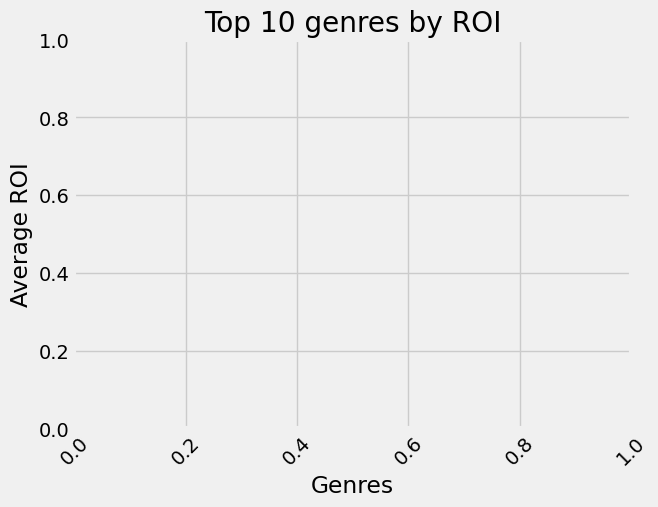

In [74]:
# Evaluating which genre actually brings in more return on investment 
# Group by Genre and calculate the mean ROI for each genre
genre_roi = budget_df.groupby('genres')['ROI'].mean().sort_values(ascending=False)

# Plotting the top 10 genres by ROI
plt.title("Top 10 genres by ROI")
plt.xlabel("Genres")
plt.ylabel("Average ROI")
plt.xticks(rotation=45)
plt.show()

Based on the analysis, the following genres consistently yield strong financial returns.
* Horror
* Mystery
* Documentry
* Drama
* Animation

In addition to these top performers, genres such as comedy. Crime, Biography, Thriller, Adventure, and action also show promising results.

**Recommendation**: Prioritize investment in high-ROI genres — Horror, Mystery, Documentary, Drama, and Animation—and consider expanding into Comedy, Crime, Biography, Thriller, Adventure, and Action to maximize portfolio returns.

### **Conclusion**

* The company should focus on the following genres to draw a wider audience at the box office as they have the highest average ratings: adventure movies, action, drama and comedy movies. In addition, run time on its own has no impact on the movie rating and as such should not be the main point of focus when producing movies
* January shows the lowest movie ratings across all genres. To optimize audience reception, we recommend avoiding major releases during this month.
* The data analysis uncovers a complex relationship among ratings, ROI, genres, and directors. Some directors find both financial and critical success by choosing popular genres like Action and Adventure, while others focus on lower-budget, high-quality films that achieve moderate to high returns. Although high production budgets aren’t always necessary for financial success, they can sometimes drive high ratings in certain genres.
* Certain genres tend to align closely with specific MPAA ratings. For instance from the above analysis Action and Adventure films are often rated PG-13 or R, suggesting they cater to both younger viewers and adults. Films rated G or PG typically generate higher revenues due to their family-friendly appeal, particularly in genres such as Animation and Family. Similarly, genres like Action and Adventure and Drama tend to exhibit higher box office revenues.
* Focus investment on high-ROI genres—Horror, Mystery, Documentary, Drama, and Animation—while expanding into Comedy, Crime, Biography, Thriller, Adventure, and Action to maximize returns.